In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, cutflow
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,
Comm: tls://192.168.202.53:8786,Workers: 0
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,Total threads: 0
Started: 2 hours ago,Total memory: 0 B


In [9]:
# samples_4mu = [
#     "4Mu_500GeV_5p0GeV_0p8mm",
# ]

samples_2mu = [
    # "2Mu2E_500GeV_5p0GeV_0p8mm",
    # "2Mu2E_200GeV_0p25GeV_5p0mm",
]

samples_bkg = [
    "TTJets",
]

In [10]:
# fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", max_files=-1, location_cfg="signal_4mu_v10.yaml")
# fileset_2mu = utilities.make_fileset(samples_2mu, "llpNanoAOD_v2", max_files=3, location_cfg="signal_2mu2e_v10.yaml")
fileset_ori_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", max_files=5, location_cfg="backgrounds.yaml")
fileset_skim_bkg = utilities.make_fileset(samples_bkg, "skimmed_llpNanoAOD_v2", max_files=5, location_cfg="backgrounds.yaml")

runner = processor.Runner(
    # executor=processor.DaskExecutor(client=client),
    schema=NanoAODSchema,
    executor=processor.IterativeExecutor(),
    # executor=processor.FuturesExecutor(),    
#    maxchunks=10, 
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    # ["isolation_base"],
    ["base"],
    lj_reco_choices=["0.4"],
)

# output_2mu = runner.run(fileset_2mu, treename="Events", processor_instance=p)
output_skim = runner.run(fileset_skim_bkg, treename="Events", processor_instance=p)

# import coffea.util as coffea_util
# coffea_util.save(p, "processor.coffea")
# print(coffea_util.load("processor.coffea"))
# with performance_report(filename="dask-report.html"):
#     # output_4mu = runner.run(fileset_4mu, treename="Events", processor_instance=p)
#     output_ori = runner.run(fileset_ori_bkg, treename="Events", processor_instance=p)
#     output_skim = runner.run(fileset_skim_bkg, treename="Events", processor_instance=p)

# out_4mu = output_4mu["out"]
# out_2mu = output_2mu["out"]
# out_ori = output_ori["out"]
out_skim = output_skim["out"]

NameError: name 'utilities' is not defined

In [ ]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["lj_pt"][channels[0], :], density=False, label="Orignal TTJets")
    utilities.plot(out_skim[sample]["hists"]["lj_pt"][channels[0], :], density=False, label="Skimmed TTJets")
plt.legend()

plt.subplot(1,3,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["lj_eta"][channels[0], :], density=False, label="Orignal TTJets")
    utilities.plot(out_skim[sample]["hists"]["lj_eta"][channels[0], :], density=False, label="Skimmed TTJets")
plt.legend()

plt.subplot(1,3,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["lj_phi"][channels[0], :], density=False, label="Orignal TTJets")
    utilities.plot(out_skim[sample]["hists"]["lj_phi"][channels[0], :], density=False, label="Skimmed TTJets")
plt.legend()

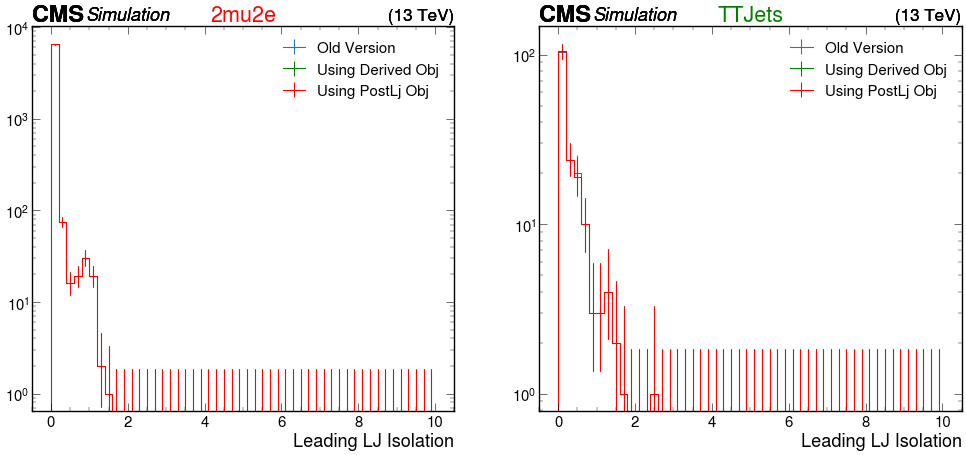

In [5]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_lj_isolation"][channels[0], :], density=False, label="Old Version")
    utilities.plot(out_2mu[sample]["hists"]["new_leading_lj_isolation"][channels[0], :], density=False, label="Using Derived Obj", color='g')
    utilities.plot(out_2mu[sample]["hists"]["post_leading_lj_isolation"][channels[0], :], density=False, label="Using PostLj Obj", color='r')
plt.legend()
plt.title("2mu2e", color='r')
plt.yscale("log")

plt.subplot(1,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_lj_isolation"][channels[0], :], density=False, label="Old Version")
    utilities.plot(out_bkg[sample]["hists"]["new_leading_lj_isolation"][channels[0], :], density=False, label="Using Derived Obj", color='g')
    utilities.plot(out_bkg[sample]["hists"]["post_leading_lj_isolation"][channels[0], :], density=False, label="Using PostLj Obj", color='r')
plt.legend()
plt.title("TTJets", color='g')
plt.yscale("log")

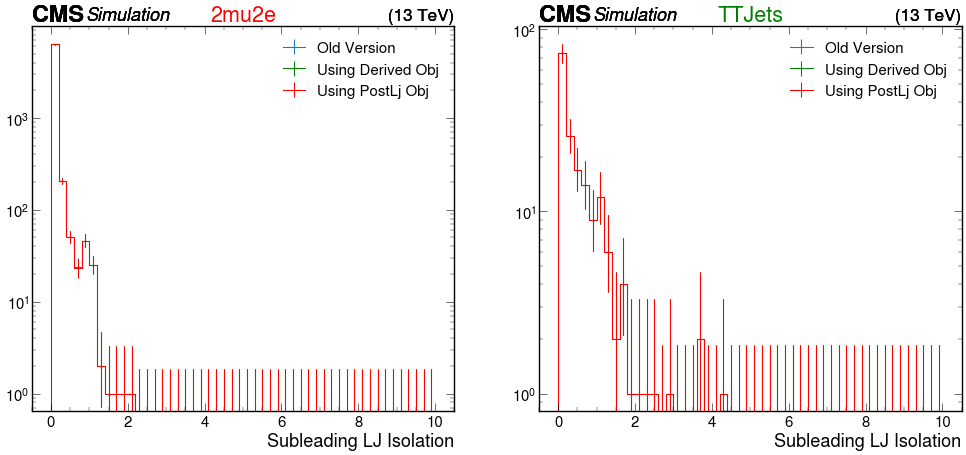

In [6]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_lj_isolation"][channels[0], :], density=False, label="Old Version")
    utilities.plot(out_2mu[sample]["hists"]["new_subleading_lj_isolation"][channels[0], :], density=False, label="Using Derived Obj", color='g')
    utilities.plot(out_2mu[sample]["hists"]["post_subleading_lj_isolation"][channels[0], :], density=False, label="Using PostLj Obj", color='r')
plt.legend()
plt.title("2mu2e", color='r')
plt.yscale("log")

plt.subplot(1,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_lj_isolation"][channels[0], :], density=False, label="Old Version")
    utilities.plot(out_bkg[sample]["hists"]["new_subleading_lj_isolation"][channels[0], :], density=False, label="Using Derived Obj", color='g')
    utilities.plot(out_bkg[sample]["hists"]["post_subleading_lj_isolation"][channels[0], :], density=False, label="Using PostLj Obj", color='r')
plt.legend()
plt.title("TTJets", color='g')
plt.yscale("log")

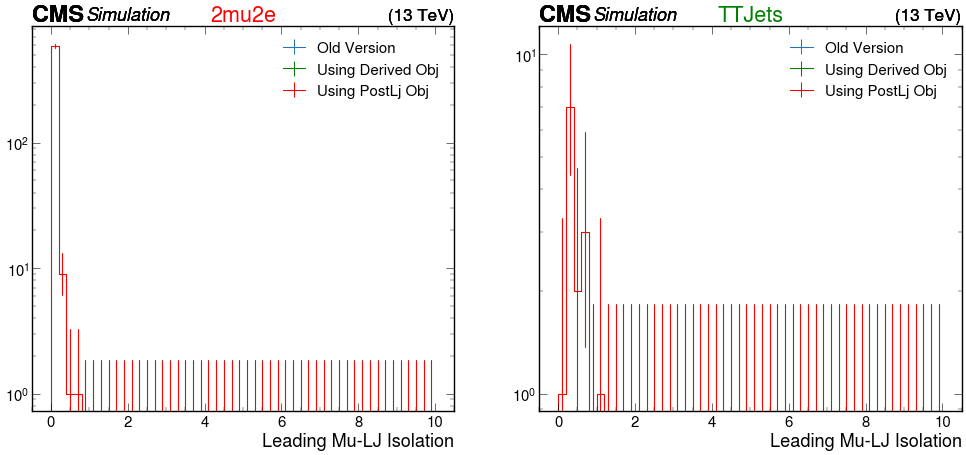

In [5]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_lj_isolation"][channels[0], :], density=False, label="Old Version")
    utilities.plot(out_2mu[sample]["hists"]["new_leading_mu_lj_isolation"][channels[0], :], density=False, label="Using Derived Obj", color='g')
    utilities.plot(out_2mu[sample]["hists"]["post_leading_mu_lj_isolation"][channels[0], :], density=False, label="Using PostLj Obj", color='r')
plt.legend()
plt.title("2mu2e", color='r')
plt.yscale("log")

plt.subplot(1,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_mu_lj_isolation"][channels[0], :], density=False, label="Old Version")
    utilities.plot(out_bkg[sample]["hists"]["new_leading_mu_lj_isolation"][channels[0], :], density=False, label="Using Derived Obj", color='g')
    utilities.plot(out_bkg[sample]["hists"]["post_leading_mu_lj_isolation"][channels[0], :], density=False, label="Using PostLj Obj", color='r')
plt.legend()
plt.title("TTJets", color='g')
plt.yscale("log")

In [6]:
old_vals  = out_2mu["2Mu2E_200GeV_0p25GeV_5p0mm"]["hists"]["leading_mu_lj_isolation"][channels[0], :].values()
derived_vals = out_2mu["2Mu2E_200GeV_0p25GeV_5p0mm"]["hists"]["new_leading_mu_lj_isolation"][channels[0], :].values()
postlj_vals = out_2mu["2Mu2E_200GeV_0p25GeV_5p0mm"]["hists"]["post_leading_mu_lj_isolation"][channels[0], :].values()

print(sum(old_vals))
print(sum(derived_vals))
print(sum(postlj_vals))

600.0
600.0
600.0


In [7]:
old_vals  = out_bkg["TTJets"]["hists"]["leading_mu_lj_isolation"][channels[0], :].values()
derived_vals = out_bkg["TTJets"]["hists"]["new_leading_mu_lj_isolation"][channels[0], :].values()
postlj_vals = out_bkg["TTJets"]["hists"]["post_leading_mu_lj_isolation"][channels[0], :].values()

print(sum(old_vals))
print(sum(derived_vals))
print(sum(postlj_vals))

14.0
14.0
14.0


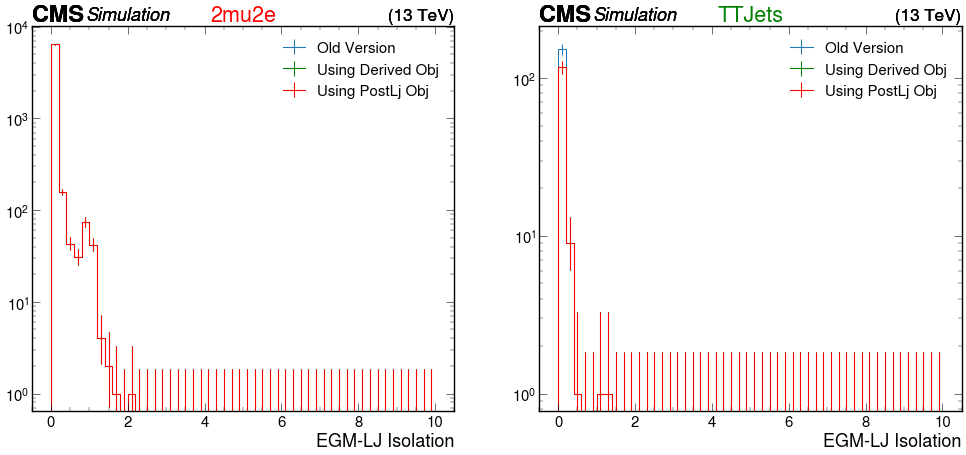

In [8]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=False, label="Old Version")
    utilities.plot(out_2mu[sample]["hists"]["new_leading_egm_lj_isolation"][channels[0], :], density=False, label="Using Derived Obj", color='g')
    utilities.plot(out_2mu[sample]["hists"]["post_leading_egm_lj_isolation"][channels[0], :], density=False, label="Using PostLj Obj", color='r')
plt.legend()
plt.title("2mu2e", color='r')
plt.yscale("log")

plt.subplot(1,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=False, label="Old Version")
    utilities.plot(out_bkg[sample]["hists"]["new_leading_egm_lj_isolation"][channels[0], :], density=False, label="Using Derived Obj", color='g')
    utilities.plot(out_bkg[sample]["hists"]["post_leading_egm_lj_isolation"][channels[0], :], density=False, label="Using PostLj Obj", color='r')
plt.legend()
plt.title("TTJets", color='g')
plt.yscale("log")

In [33]:
old_vals  = out_2mu["2Mu2E_200GeV_0p25GeV_5p0mm"]["hists"]["egm_lj_isolation"][channels[0], :].values()
derived_vals = out_2mu["2Mu2E_200GeV_0p25GeV_5p0mm"]["hists"]["new_leading_egm_lj_isolation"][channels[0], :].values()
postlj_vals = out_2mu["2Mu2E_200GeV_0p25GeV_5p0mm"]["hists"]["post_leading_egm_lj_isolation"][channels[0], :].values()

print(sum(old_vals))
print(sum(derived_vals))
print(sum(postlj_vals))

6814.0
6814.0
6814.0


In [34]:
old_vals  = out_bkg["TTJets"]["hists"]["egm_lj_isolation"][channels[0], :].values()
derived_vals = out_bkg["TTJets"]["hists"]["new_leading_egm_lj_isolation"][channels[0], :].values()
postlj_vals = out_bkg["TTJets"]["hists"]["post_leading_egm_lj_isolation"][channels[0], :].values()

print(sum(old_vals))
print(sum(derived_vals))
print(sum(postlj_vals))

164.0
129.0
129.0


In [10]:
for sample in samples_2mu:
    print(sample)
    out_2mu[sample]["cutflow"]["base"].print_table(fraction=False)
    print()
    print()

2Mu2E_200GeV_0p25GeV_5p0mm
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection             123555.0     123555.0
pass triggers             47092.0      47092.0
PV filter                123085.0      46889.0
>=2 LJs                   12685.0       6815.0




In [11]:
for sample in samples_bkg:
    print(sample)
    out_bkg[sample]["cutflow"]["base"].print_table(fraction=False)
    print()
    print()

TTJets
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection             446180.0     446180.0
pass triggers             28380.0      28380.0
PV filter                445189.0      28305.0
>=2 LJs                    8456.0        172.0




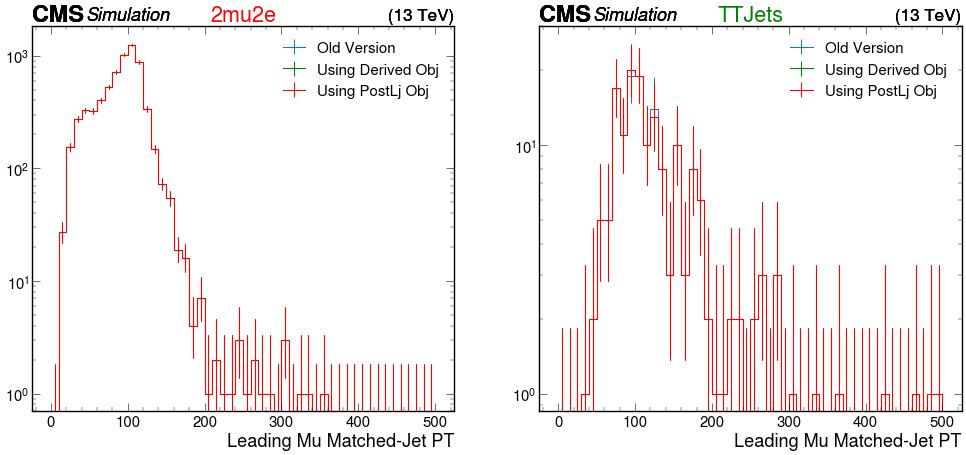

In [6]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matched_jet_pt"][channels[0], :], density=False, label="Old Version")
    utilities.plot(out_2mu[sample]["hists"]["new_leading_mu_matched_jet_pt"][channels[0], :], density=False, label="Using Derived Obj", color='g')
    utilities.plot(out_2mu[sample]["hists"]["post_leading_mu_matched_jet_pt"][channels[0], :], density=False, label="Using PostLj Obj", color='r')
plt.legend()
plt.title("2mu2e", color='r')
plt.yscale("log")

plt.subplot(1,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_mu_matched_jet_pt"][channels[0], :], density=False, label="Old Version")
    utilities.plot(out_bkg[sample]["hists"]["new_leading_mu_matched_jet_pt"][channels[0], :], density=False, label="Using Derived Obj", color='g')
    utilities.plot(out_bkg[sample]["hists"]["post_leading_mu_matched_jet_pt"][channels[0], :], density=False, label="Using PostLj Obj", color='r')
plt.legend()
plt.title("TTJets", color='g')
plt.yscale("log")

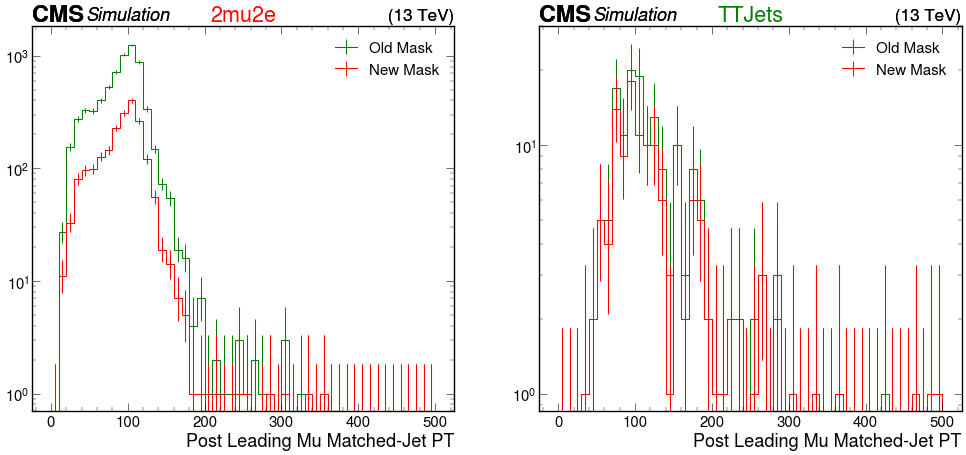

In [8]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["post_leading_mu_matched_jet_pt"][channels[0], :], density=False, label="Old Mask", color='g')
    utilities.plot(out_2mu[sample]["hists"]["test_post_leading_mu_matched_jet_pt"][channels[0], :], density=False, label="New Mask", color='r')
plt.legend()
plt.title("2mu2e", color='r')
plt.yscale("log")

plt.subplot(1,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["post_leading_mu_matched_jet_pt"][channels[0], :], density=False, label="Old Mask", color='g')
    utilities.plot(out_bkg[sample]["hists"]["test_post_leading_mu_matched_jet_pt"][channels[0], :], density=False, label="New Mask", color='r')
plt.legend()
plt.title("TTJets", color='g')
plt.yscale("log")

In [9]:
old_mask = out_2mu["2Mu2E_200GeV_0p25GeV_5p0mm"]["hists"]["post_leading_mu_matched_jet_pt"][channels[0], :].values()
new_mask = out_2mu["2Mu2E_200GeV_0p25GeV_5p0mm"]["hists"]["test_post_leading_mu_matched_jet_pt"][channels[0], :].values()

print(sum(old_mask))
print(sum(new_mask))

6564.0
2024.0


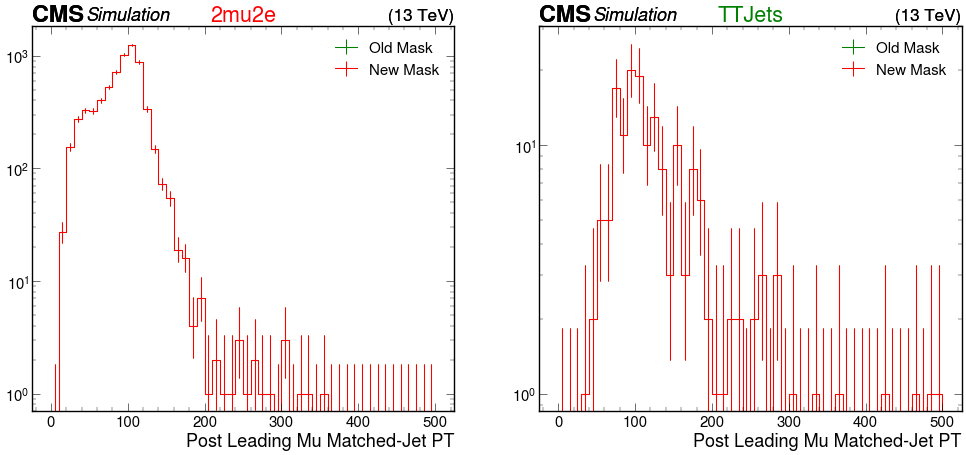

In [5]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["post_leading_mu_matched_jet_pt"][channels[0], :], density=False, label="Old Mask", color='g')
    utilities.plot(out_2mu[sample]["hists"]["test_post_leading_mu_matched_jet_pt"][channels[0], :], density=False, label="New Mask", color='r')
plt.legend()
plt.title("2mu2e", color='r')
plt.yscale("log")

plt.subplot(1,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["post_leading_mu_matched_jet_pt"][channels[0], :], density=False, label="Old Mask", color='g')
    utilities.plot(out_bkg[sample]["hists"]["test_post_leading_mu_matched_jet_pt"][channels[0], :], density=False, label="New Mask", color='r')
plt.legend()
plt.title("TTJets", color='g')
plt.yscale("log")

Text(1, 0, 'Leading Mu Matched-Jet PT')

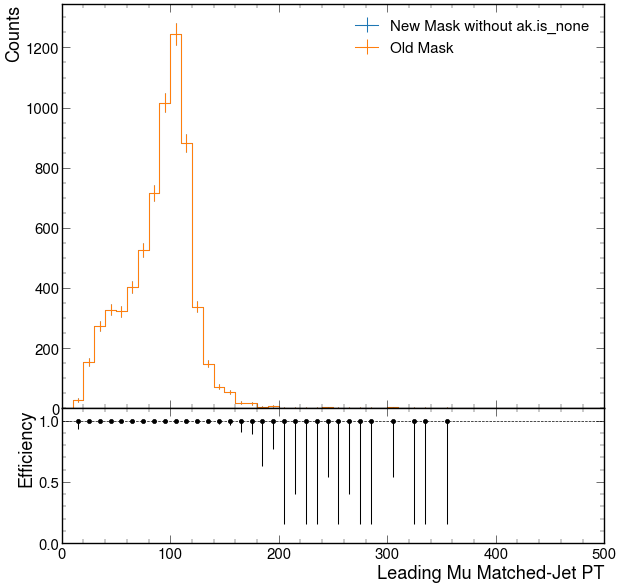

In [6]:
plt.figure(figsize=(14, 14))
out_2mu["2Mu2E_200GeV_0p25GeV_5p0mm"]["hists"]["test_post_leading_mu_matched_jet_pt"][channels[0], :].plot_ratio(
       out_2mu["2Mu2E_200GeV_0p25GeV_5p0mm"]["hists"]["post_leading_mu_matched_jet_pt"][channels[0],:], 
       rp_num_label="New Mask without ak.is_none",
       rp_denom_label="Old Mask",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("Leading Mu Matched-Jet PT")

Text(1, 0, 'Leading Mu Matched-Jet PT')

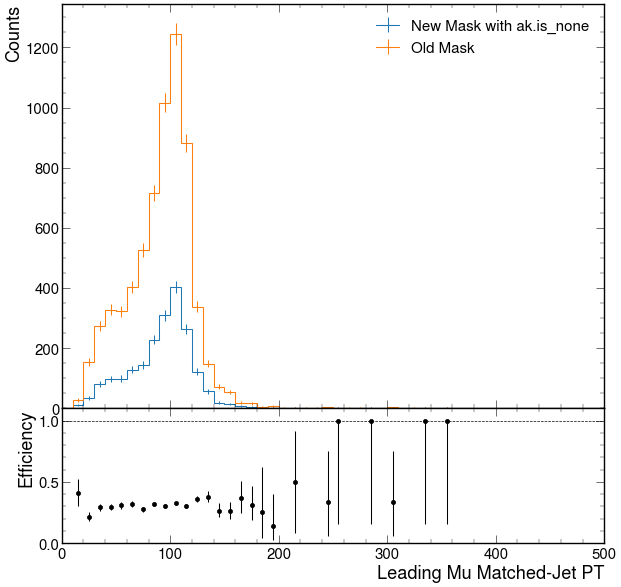

In [7]:
plt.figure(figsize=(14, 14))
out_2mu["2Mu2E_200GeV_0p25GeV_5p0mm"]["hists"]["nonetest_post_leading_mu_matched_jet_pt"][channels[0], :].plot_ratio(
       out_2mu["2Mu2E_200GeV_0p25GeV_5p0mm"]["hists"]["post_leading_mu_matched_jet_pt"][channels[0],:], 
       rp_num_label="New Mask with ak.is_none",
       rp_denom_label="Old Mask",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("Leading Mu Matched-Jet PT")

In [1]:
import uproot
filename = "root://xcache//store/group/lpcmetx/SIDM/Backgrounds/2018_v2/Skims/TTJets_TuneCP5/skimmed_output1_4.root"
with uproot.open(filename) as f:
    print(f.keys())  # List available trees

['Events;1']


In [2]:
with uproot.open(filename + ":Events") as tree:
    print(tree.keys())  # List available branches

['run', 'luminosityBlock', 'event', 'HTXS_Higgs_pt', 'HTXS_Higgs_y', 'HTXS_stage1_1_cat_pTjet25GeV', 'HTXS_stage1_1_cat_pTjet30GeV', 'HTXS_stage1_1_fine_cat_pTjet25GeV', 'HTXS_stage1_1_fine_cat_pTjet30GeV', 'HTXS_stage1_2_cat_pTjet25GeV', 'HTXS_stage1_2_cat_pTjet30GeV', 'HTXS_stage1_2_fine_cat_pTjet25GeV', 'HTXS_stage1_2_fine_cat_pTjet30GeV', 'HTXS_stage_0', 'HTXS_stage_1_pTjet25', 'HTXS_stage_1_pTjet30', 'HTXS_njets25', 'HTXS_njets30', 'nBS', 'BS_x', 'BS_y', 'BS_z', 'BS_ndof', 'BS_chi2', 'BS_ntracks', 'nboostedTau', 'boostedTau_chargedIso', 'boostedTau_eta', 'boostedTau_leadTkDeltaEta', 'boostedTau_leadTkDeltaPhi', 'boostedTau_leadTkPtOverTauPt', 'boostedTau_mass', 'boostedTau_neutralIso', 'boostedTau_phi', 'boostedTau_photonsOutsideSignalCone', 'boostedTau_pt', 'boostedTau_puCorr', 'boostedTau_rawAntiEle2018', 'boostedTau_rawIso', 'boostedTau_rawIsodR03', 'boostedTau_rawMVAnewDM2017v2', 'boostedTau_rawMVAoldDM2017v2', 'boostedTau_rawMVAoldDMdR032017v2', 'boostedTau_charge', 'boostedT

In [4]:
pip install ROOT

ERROR: Could not find a version that satisfies the requirement ROOT (from versions: none)
ERROR: No matching distribution found for ROOT
Note: you may need to restart the kernel to use updated packages.


In [5]:
import ROOT
f = ROOT.TFile.Open(filename)
if f.IsZombie():
    print("File is corrupted!")
else:
    f.ls()

ModuleNotFoundError: No module named 'ROOT'

In [6]:
pip install --upgrade coffea uproot

  Obtaining dependency information for coffea from https://files.pythonhosted.org/packages/1e/be/0cff1d014ddb581d9a4147634930c949268480c34894a85b31aea8f1f871/coffea-2025.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for uproot from https://files.pythonhosted.org/packages/8f/4a/ea424af833cbb53b942ddd6e6cfa7eb7ac9c2dcca7d3ffeb17dd3995f420/uproot-5.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for awkward>=2.6.7 from https://files.pythonhosted.org/packages/62/1b/e7a8d68448a5e27278379209a640b36a029b9994e2f25c52c196825e099f/awkward-2.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for correctionlib>=2.6.0 from https://files.pythonhosted.org/packages/ae/f1/d755952805d6b8035104ef55c3c69283300c27cc080dce21a88f0de67c21/correctionlib-2.6.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for dask-awkward>=2025.2.0 from https://files.pythonhosted.org/packages/c3/bb/4ed1cf765bea279c21a3587805

In [6]:
import coffea.processor.ProcessorABC

ModuleNotFoundError: No module named 'coffea.processor.ProcessorABC'

In [2]:
pip show coffea

Name: coffea
Version: 0.7.22
Summary: Tools for doing Collider HEP style analysis with columnar operations
Home-page: https://github.com/CoffeaTeam/coffea
Author: Lindsey Gray (Fermilab)
Author-email: lagray@fnal.gov
License: BSD 3-clause
Location: /opt/conda/lib/python3.9/site-packages
Requires: awkward, cachetools, cloudpickle, correctionlib, fsspec, hist, lz4, matplotlib, mplhep, numba, numpy, packaging, pandas, pyarrow, scipy, toml, tqdm, uproot, uproot3, uproot3-methods
Required-by: 
Note: you may need to restart the kernel to use updated packages.
